1e-07 0.174333333333 0.163
0.0001 0.17445 0.1631
0.1 0.174683333333 0.1633
1 0.174716666667 0.1635
1000 0.176466666667 0.1644
1000000 0.249066666667 0.2426
1000000000 0.26525 0.2616
1000000000000 0.887633333333 0.8865


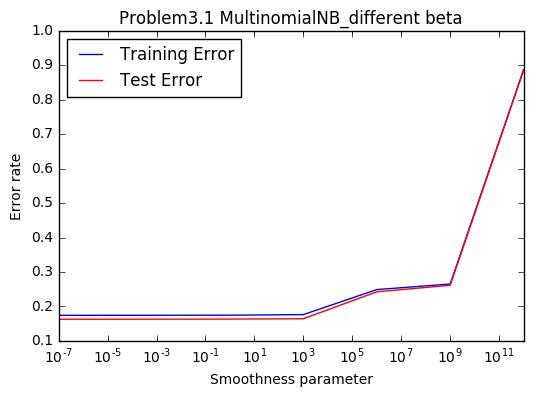

beta is infinite:
0.901283333333 0.902


In [11]:
import csv
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import fetch_mldata
#load data
mnist = fetch_mldata('MNIST-original')
train=mnist.data[0:60000, :]
test=mnist.data[60000:70000, :]
Xtrn=mnist.data[0:60000, :]
Ytrn=mnist.target[0:60000]
Xtst=mnist.data[60000:, :]
Ytst=mnist.target[60000:]

#Problem 3.1
#fit model
beta=[0.0000001, 0.0001, 0.1, 1, 1000, 1000000, 1000000000, 1000000000000]
TrnErr=list(range(0,8))
TstErr=list(range(0,8))
n=0
for i in beta:
  
    clf=MultinomialNB(alpha=i,fit_prior = True,class_prior = None)
    clf = clf.fit(Xtrn,Ytrn)
    TrnErr[n]=1-clf.score(Xtrn,Ytrn)  
    TstErr[n]=1-clf.score(Xtst,Ytst)
    print(i,TrnErr[n],TstErr[n])
    n=n+1
#plot    
plt.figure()
plt.plot(beta, TrnErr, c='blue', label='Training Error')
plt.plot(beta, TstErr, c='red', label='Test Error')
plt.legend(loc = 0)
plt.ylabel('Error rate')
plt.xlabel('Smoothness parameter')
plt.title('Problem3.1 MultinomialNB_different beta')
plt.xscale('log')
plt.ylim(0.1, 1)
plt.show()

#Problem 3.2, beta is infinite
clf2=MultinomialNB(alpha=float("inf"),fit_prior = True,class_prior = None)
clf2 = clf2.fit(Xtrn,Ytrn)
TrnErr_2=1-clf2.score(Xtrn,Ytrn)  
TstErr_2=1-clf2.score(Xtst,Ytst)
print('beta is infinite:')
print(TrnErr_2,TstErr_2)
    